In [97]:
import numpy as np
import uproot
import awkward
import pandas as pd
import plotly.express as px
#using plotly as backend
pd.options.plotting.backend = "plotly"

inputFile = "/Users/pbutti/sw/mip_tracking/4gev_1e_tskim_v12_kaons_ldmx-det-v12_toughkskim.root"

with uproot.open(inputFile) as infile:
    ldmx_event_tree = infile["LDMX_Events"]
    ecal_rec_hits = ldmx_event_tree.arrays(["EcalRecHits_v3_v12.xpos_","EcalRecHits_v3_v12.ypos_","EcalRecHits_v3_v12.zpos_"],library="pd")
    print(ecal_rec_hits)
    
    #flatten the hits
    ecal_rec_hits_flat = ecal_rec_hits.reset_index()



                EcalRecHits_v3_v12.xpos_  EcalRecHits_v3_v12.ypos_  \
entry subentry                                                       
0     0                    -1.668264e+01                 -9.631728   
      1                    -8.341321e+00                  4.815864   
      2                    -1.251198e+01                 -2.407932   
      3                    -4.170660e+00                -60.198299   
      4                    -2.085330e+01                -16.855524   
...                                  ...                       ...   
34    39                   -8.341321e+00                 19.263456   
      40                   -4.170660e+00                 26.487251   
      41                    2.664535e-15                 19.263456   
      42                   -8.341321e+00                  4.815864   
      43                   -1.668264e+01                 19.263456   

                EcalRecHits_v3_v12.zpos_  
entry subentry                            
0  

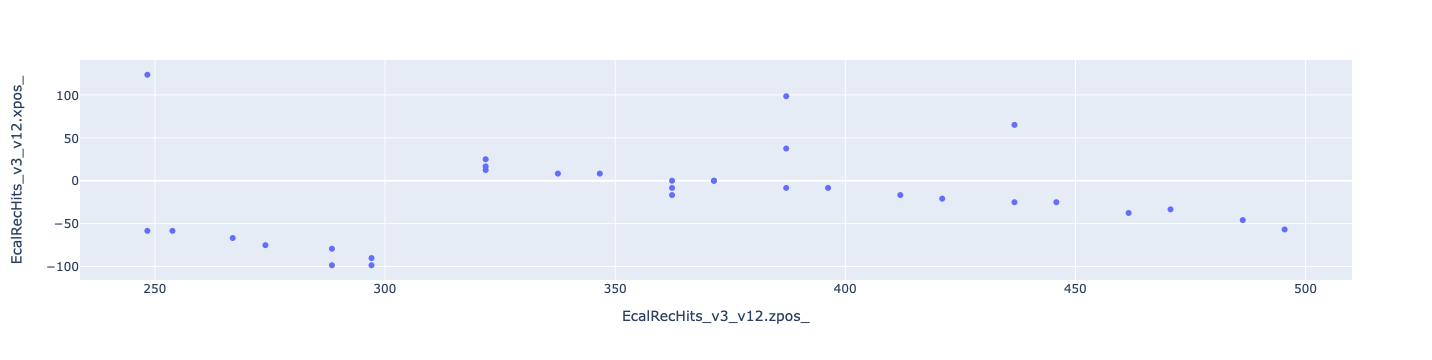

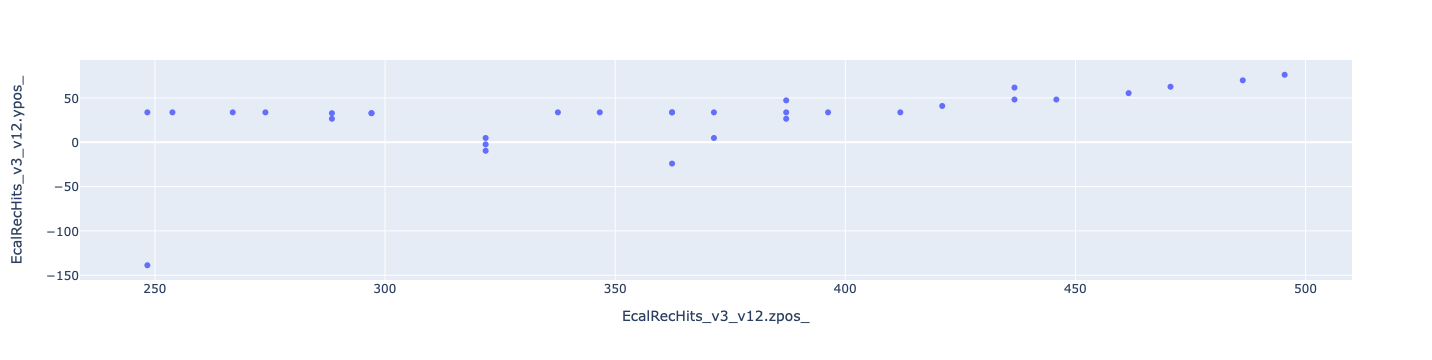

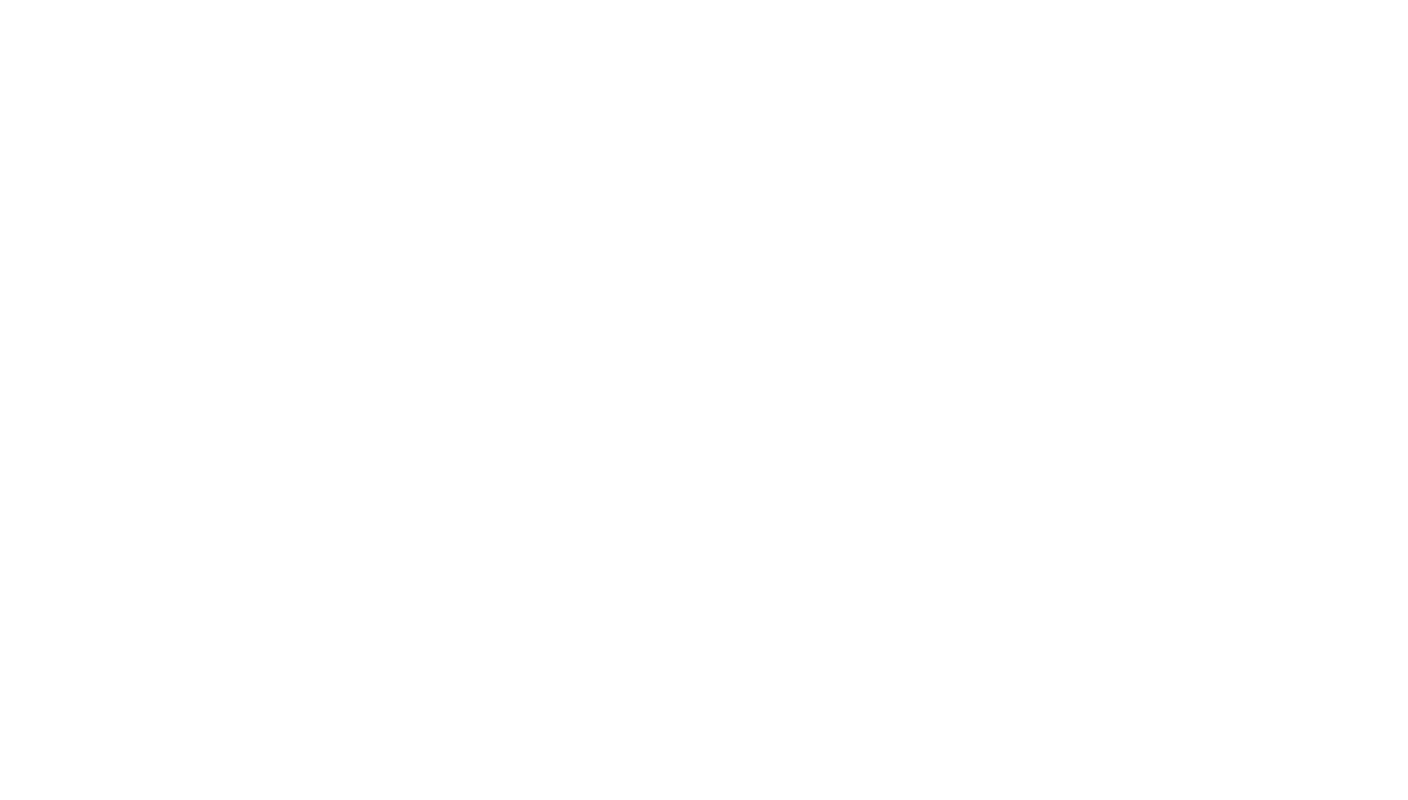

In [99]:
#Try to plot the projections
import plotly.graph_objects as go
from plotly.subplots import make_subplots

eventNr = 3
ecal_rec_hits_flat = ecal_rec_hits_flat[ecal_rec_hits_flat["entry"] == eventNr]


trace1 = go.Scatter(
    x=ecal_rec_hits_flat["EcalRecHits_v3_v12.zpos_"],
    y=ecal_rec_hits_flat["EcalRecHits_v3_v12.xpos_"],
    error_y = dict(
    # value of error bar given in data coordinates
        type ='data',
        array = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],
        visible = True),
    mode='markers',
    marker=dict(
        size=5,
        line=dict(width=0)),
    name='hits')


fig = ecal_rec_hits_flat.plot.scatter(x="EcalRecHits_v3_v12.zpos_",y="EcalRecHits_v3_v12.xpos_",)
#fig.update_traces(marker_size = 4)
#fig.add_trace(trace1)
#fig.update_xaxes(range=[200, 700])
#fig.update_yaxes(range=[-100, 100])
fig.show()

fig = ecal_rec_hits_flat.plot.scatter(x="EcalRecHits_v3_v12.zpos_",y="EcalRecHits_v3_v12.ypos_")
#fig.update_xaxes(range=[200, 700])
#fig.update_yaxes(range=[-100, 100])
#fig.update_traces(marker_size = 4)
#fig.add_trace(trace1)
fig.show()

fig = px.scatter_3d(ecal_rec_hits_flat, x='EcalRecHits_v3_v12.xpos_', y='EcalRecHits_v3_v12.ypos_', z='EcalRecHits_v3_v12.zpos_',width = 800, height = 800)
#fig.update_layout(autosize=False,margin=dict(l=0, r=0, b=0, t=0))
#fig.update_traces(marker_size = 4)

#fig.update_xaxes(range=[200, 700])
#fig.update_yaxes(range=[-100, 100])


#fig.update_layout(
#    scene = dict(
#        xaxis = dict(nticks=6, range=[200,700],),
#                     yaxis = dict(nticks=10, range=[-100,100],),
#                     zaxis = dict(nticks=10, range=[-100,100],),),
#    autosize=False,
#    margin=dict(r=20, l=10, b=10, t=10))



fig.show()



In [95]:
#print the input for the IPOL paper 
#https://www.ipol.im/pub/art/2017/208/?utm_source=doi
ecal_rec_hits_flat.to_csv("./test_evt_"+str(eventNr)+".csv",index=False)


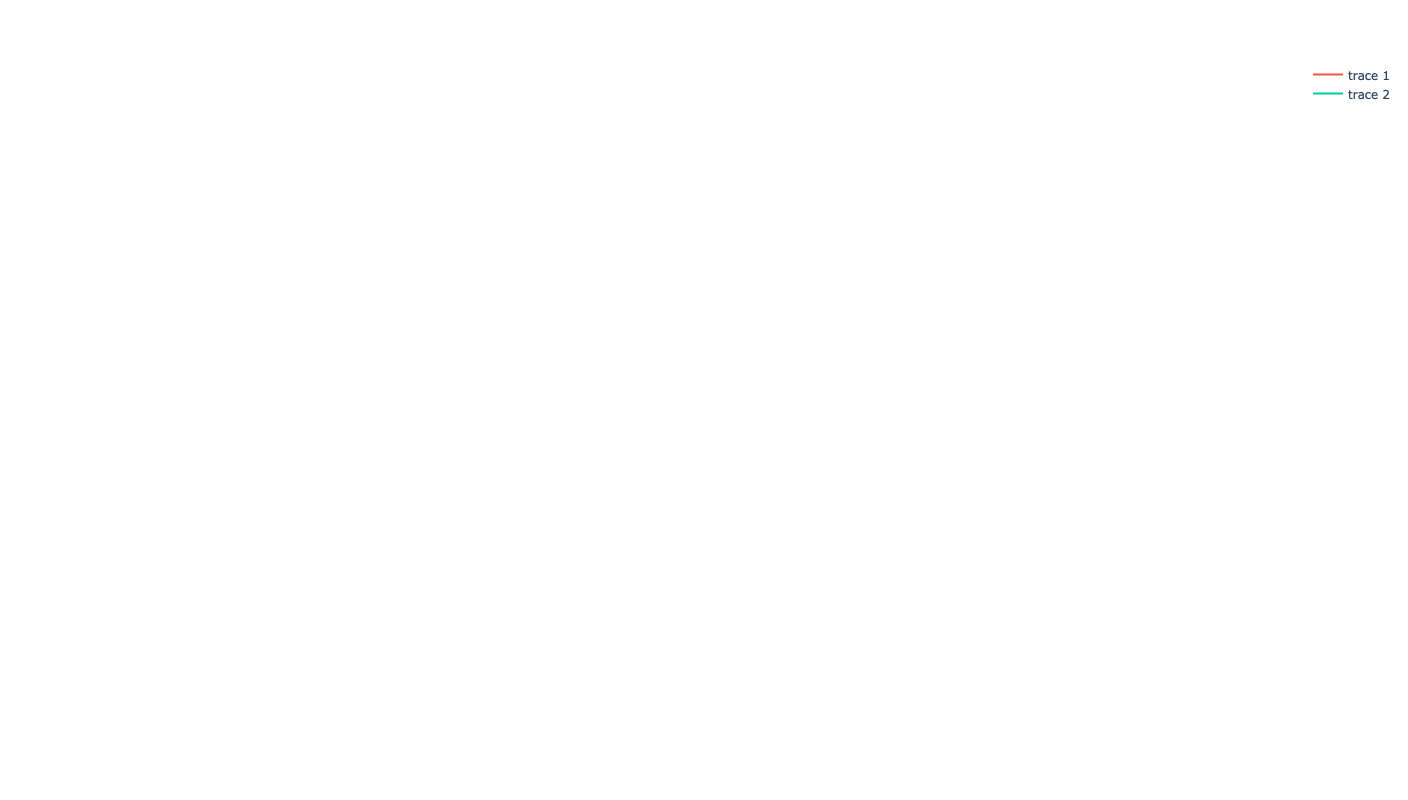

In [96]:

#npoints=18, a=(-22.243523,13.644948,308.469444), b=(0.053939,-0.023376,-0.998271)
#npoints=15, a=(-16.126554,42.379603,373.243333), b=(0.113993,-0.325988,-0.938476)

#a is the anchor point
#b is the direction
def formLine(a,b, step = 100):
    #a0 -> x
    #a1 -> y
    #a2 -> z
    
    x0 = a[0]
    y0 = a[1]
    z0 = a[2]
    
    x1 = a[0] + b[0]*step
    y1 = a[1] + b[1]*step
    z1 = a[2] + b[2]*step
    
    x2 = a[0] - b[0]*step
    y2 = a[1] - b[1]*step
    z2 = a[2] - b[2]*step
    
    x = np.array([x0,x1,x2])
    y = np.array([y0,y1,y2])
    z = np.array([z0,z1,z2])
    
    return (x,y,z)

line  = formLine(a=(-22.243523,13.644948,308.469444), b=(0.053939,-0.023376,-0.998271))
line2 = formLine(a=(-16.126554,42.379603,373.243333), b=(0.113993,-0.325988,-0.938476))


trace1 = go.Scatter3d(x=line[0],y=line[1],z=line[2],mode='lines') 
trace2 = go.Scatter3d(x=line2[0],y=line2[1],z=line2[2],mode='lines') 

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.show()

In [7]:
import ROOT as r
from array import array 

file = r.TFile("output.root","RECREATE")
file.cd()
tree = r.TTree("outtree","outtree")
test = array('d',[0])
tree.Branch("test",test,"test/D")

for i in range(100):
    test[0] = i;
    tree.Fill()
    
file.cd()
tree.Write()
file.Close()


